# Lab 3 - Exploring and manipulating data.
## Bambee Garfield
## July 12th, 2024
Here is what we we do:
1. Prepare the data
2. Train 3 models
- Decision Tree
- SVM using rgb
- Neural Net
3. Get model performance on train and test sets
4. Create appropriate graphs

### Prepare the data

In [4]:
import pandas as pd
howell_full = pd.read_csv("Howell.csv", sep=";")


# Compute bmi based on height and weight metric units
def bmi(height, weight): return 10000*weight/(height**2)

new_feature = bmi(howell_full['height'], howell_full['weight'])

howell_full['bmi'] = new_feature
howell_full.head(n=10)

import numpy as np
def bmi_category(bmi):
# bmi can only be a single value
    if bmi < 18.5: return 'Underweight'
    if bmi < 25.0: return 'Normal'
    if bmi < 30.0: return 'Overweight'
    return 'Obese'

vector_bmi_category = np.vectorize(bmi_category)
howell_full['bmi class'] = vector_bmi_category(howell_full['bmi'])

howell_full['bmi class'].value_counts()

bmi class
Underweight    341
Normal         202
Overweight       1
Name: count, dtype: int64

In [8]:
print(howell_full.head(n=10))
print(howell_full.describe())
#howell_full.corr()

    height     weight   age  male        bmi    bmi class
0  151.765  47.825606  63.0     1  20.764297       Normal
1  139.700  36.485807  63.0     0  18.695244       Normal
2  136.525  31.864838  65.0     0  17.095718  Underweight
3  156.845  53.041914  41.0     1  21.561444       Normal
4  145.415  41.276872  51.0     0  19.520384       Normal
5  163.830  62.992589  35.0     1  23.469433       Normal
6  149.225  38.243476  32.0     0  17.174108  Underweight
7  168.910  55.479971  27.0     1  19.445786       Normal
8  147.955  34.869885  19.0     0  15.929099  Underweight
9  165.100  54.487739  54.0     1  19.989625       Normal
           height      weight         age        male         bmi
count  544.000000  544.000000  544.000000  544.000000  544.000000
mean   138.263596   35.610618   29.344393    0.472426   17.396489
std     27.602448   14.719178   20.746888    0.499699    2.530607
min     53.975000    4.252425    0.000000    0.000000    9.815018
25%    125.095000   22.007717   

array([[<Axes: xlabel='height', ylabel='height'>,
        <Axes: xlabel='weight', ylabel='height'>,
        <Axes: xlabel='age', ylabel='height'>],
       [<Axes: xlabel='height', ylabel='weight'>,
        <Axes: xlabel='weight', ylabel='weight'>,
        <Axes: xlabel='age', ylabel='weight'>],
       [<Axes: xlabel='height', ylabel='age'>,
        <Axes: xlabel='weight', ylabel='age'>,
        <Axes: xlabel='age', ylabel='age'>]], dtype=object)

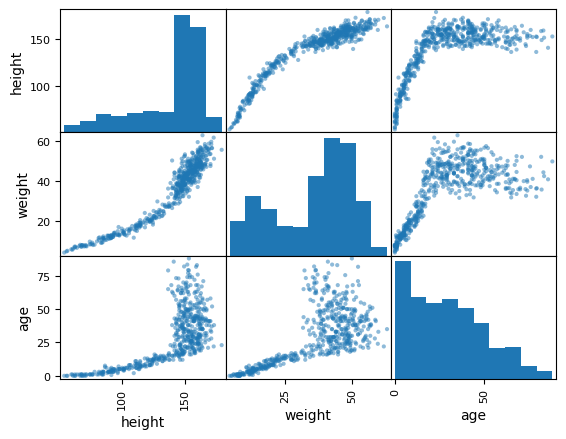

In [5]:
from pandas.plotting import scatter_matrix
attributes = ['height', 'weight', 'age']
scatter_matrix(howell_full[attributes])

### A Better Plot

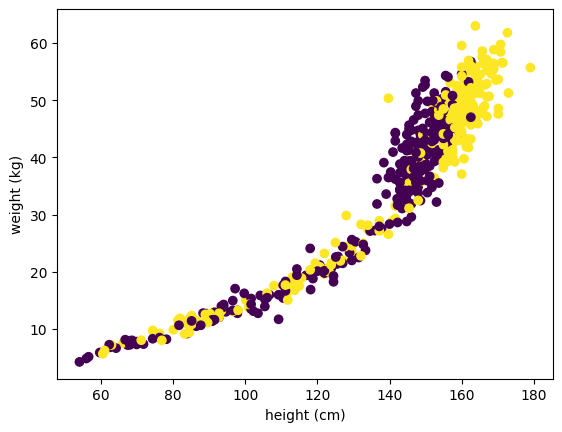

In [7]:
import matplotlib.pyplot as plt
#height = howell_full['height']
#weight = howell_full['weight']
#gender = howell_full['male']
#plt.scatter(height, weight, c=gender)
#plt.xlabel('height (cm)')
#plt.ylabel('weight (kg)')
#plt.show()

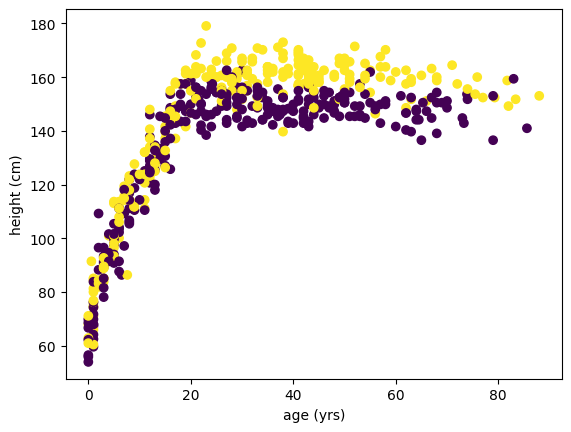

In [10]:
#age = howell_full['age']
#height = howell_full['height']
#gender = howell_full['male']
#plt.scatter(age, height, c=gender)
#plt.xlabel('age (yrs)')
#plt.ylabel('height (cm)')
#plt.show()

### Splitting the Data by Age

In [21]:
over18 = howell_full["age"] > 18
print(over18)
# Only keep the true instances
howell_adults = howell_full[over18]
howell_children = howell_full[~over18] # ~ is not in numpy
print("There are ", len(howell_adults), " adult instances")
print(howell_adults)
print("There are ", len(howell_children), " child instances")
print(howell_children)

0       True
1       True
2       True
3       True
4       True
       ...  
539    False
540     True
541     True
542    False
543     True
Name: age, Length: 544, dtype: bool
There are  346  adult instances
      height     weight   age  male        bmi    bmi class
0    151.765  47.825606  63.0     1  20.764297       Normal
1    139.700  36.485807  63.0     0  18.695244       Normal
2    136.525  31.864838  65.0     0  17.095718  Underweight
3    156.845  53.041914  41.0     1  21.561444       Normal
4    145.415  41.276872  51.0     0  19.520384       Normal
..       ...        ...   ...   ...        ...          ...
534  162.560  47.031821  27.0     0  17.797722  Underweight
537  142.875  34.246196  31.0     0  16.776442  Underweight
540  162.560  52.163080  31.0     1  19.739486       Normal
541  156.210  54.062497  21.0     0  22.155341       Normal
543  158.750  52.531624  68.0     1  20.844590       Normal

[346 rows x 6 columns]
There are  198  child instances
      height 

### Plot with Masking
Another way to restrict the instances you use is to apply masking to a numpy array. We replace certain values in the array with a mask. (This is not a NaN... the value is still there, it just won't be used.)

In this plot we are only using the adult instances (howell_adult) and we are going to create masks for male and female  (male is 1 or 0)

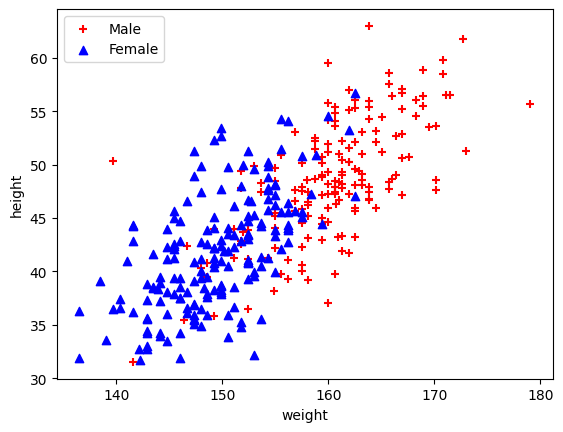

In [22]:
import matplotlib.pyplot as plt
male_height = np.ma.masked_where(howell_adults['male']==0,
howell_adults['height'])
female_height = np.ma.masked_where(howell_adults['male']==1,
howell_adults['height'])
weight = howell_adults['weight']
plt.scatter(male_height, weight, c='red', marker='+')
plt.scatter(female_height, weight, c='blue', marker='^')
plt.xlabel('weight')
plt.ylabel('height')
plt.legend(['Male', 'Female'])
plt.show()

### Stratified Test/Train Data Split

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit
data = {'male':[0,1,0,1,1,0,0,1,1,0]}
howell_adults = pd.DataFrame(data)
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)
for train_indices, test_indices in splitter.split(howell_adults,
howell_adults['male']):
    train_set = howell_adults.iloc[train_indices]
test_set = howell_adults.iloc[test_indices]
print('Train size: ', len(train_set), 'Test size: ', len(test_set))
print('Adult counts', howell_adults['male'].value_counts())
print('Train counts', train_set['male'].value_counts())
print('Test counts', test_set['male'].value_counts())

def compute_ratio(counts):
    male_count = counts.get(1, 0)
    female_count = counts.get(0, 0)
    if female_count == 0:
        return float('inf')  # Handle division by zero if there are no females
    return male_count / female_count

adult_ratio = compute_ratio(adult_counts)
train_ratio = compute_ratio(train_counts)
test_ratio = compute_ratio(test_counts)

#print('Male/Female ratio for Adults data frame:', adult_ratio)
#print('Male/Female ratio for Training data frame:', train_ratio)
#print('Male/Female ratio for Test data frame:', test_ratio)

NameError: name 'data' is not defined